** 스마트워치 센서 데이터 기반 행동 분류 2일차 **
# --------- 과제3 : 다양한 모델 사용하기 ---------


### [미션0] 과제 이해하기
   * 다양한 AI 분류 알고리즘을 사용해서 행동패턴을 구별할 수 있습니다.
   * SVM, KNN, Logistic Regression, GBM, XGBoost 알고리즘을 사용하여 모델링을 수행하고 정확도를 비교해 보세요.
  


※ 미션완수 조건: SVM, KNN, Logistic Regression, GBM, XGBoost 알고리즘으로 모델링을 수행하고 예측 정확도를 도출하여 resualt 변수에 저장하고 가장 성능이 좋은 모델을 선정해 보세요.

<span style="background-color:#fff5b1"><span style="color:red"><U>※ GBM 모델 학습시 시간이 오래 걸리므로 화장실 다녀오기에 참 좋습니다.(약 20분 소요) <U></span></span>

---

### [미션1] 데이터 불러오기
* pandas, numpy, matplotlib, seaborn, os 등 데이터 분석에필요한 라이브러리와 모듈을 불러오세요.
* 라이브러리가 없을땐 !pip 명령어를 통해 필요한 라이브러리를 설치 하세요.
* 현위치 하위 'data' 폴더에서 'train_data.csv' 파일 읽어 오세요.
* 예측 결과를 받을 result 변수를 생성 하세요.

	- 실습순서: 라이브러리 불러오기 -> 현재 디렉토리 확인 -> train_data.csv 불러오기 -> 결과 저장 변수 생성

In [1]:
# pandas, numpy, matplotlib, seaborn, os 등 필요 라이브러리 호출
# 데이터를 나누기 위한 sklearn.model_selection 모듈의 train_test_split 함수 사용
# 모델 성능 평가 출력을 위해 sklearn.metrics 모듈의 모든 클래스 사용
## 추가로 필요한 라이브러리는 설치/호출 하세요
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [2]:
# 현재 디렉토리 위치 확인
# 아래의 결과는 강사의 현재 위치(에이블러 별 다를 수 있음)
os.getcwd()

'C:\\Users\\user\\OneDrive\\0 데이터 교육 KT AIVLE School 0 0 미니프로젝트 3차_2일차\\230921_미프3차_2일차_교육생용'

In [3]:
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 '4기 DX 미프3_지도학습_교안_2일차.pdf',
 'data',
 '미프3차_A레벨_과제3-답안.ipynb',
 '미프3차_A레벨_과제3.ipynb',
 '미프3차_A레벨_과제4.ipynb',
 '미프3차_B레벨_과제3.ipynb',
 '미프3차_B레벨_과제4.ipynb']

#### 데이터셋 불러오기 < data >에 < train_data.csv > 할당

In [4]:
# 데이터셋 파일 불러오기
## data 변수에 train_data.csv 파일을 불러와서 할당해 주세요.
## train_data.csv 파일은 현재위치의 하위 data 폴더안에 있습니다. 
## 변수에 할당이 잘 되었는지 확인해 주세요. 
data = pd.read_csv("./data/train_data.csv")
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,21,STANDING
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,15,LAYING
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,-0.829311,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,11,STANDING
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.408956,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,17,WALKING
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.563437,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,17,WALKING_DOWNSTAIRS


In [5]:
# 불필요한 열 제거
## 'subject'열 은 데이터를 수집한 사람을 구별하기 위한 데이터 입니다.
## 'subject'열을 data 데이터프레임 변수 에서 제거해 주세요.
## 'subject'열이 잘 제거 되었는지 확인해 주세요.
data.drop('subject', axis=1)
data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,21,STANDING
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,15,LAYING
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,-0.829311,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,11,STANDING
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.408956,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,17,WALKING
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.563437,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,17,WALKING_DOWNSTAIRS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,0.277194,-0.012389,-0.131974,-0.994046,-0.940578,-0.917337,-0.994261,-0.932830,-0.908088,-0.936219,...,-0.690363,-0.034888,-0.261437,-0.391477,-0.877612,-0.912365,0.114009,0.080146,21,SITTING
5877,0.191568,0.013328,-0.105174,-0.126969,-0.121729,-0.327480,-0.192523,-0.109923,-0.295286,0.078644,...,-0.879215,0.721718,0.623151,0.866858,-0.445660,-0.690278,0.303194,-0.044188,15,WALKING_UPSTAIRS
5878,0.267981,-0.018348,-0.107440,-0.991303,-0.989881,-0.990313,-0.992386,-0.988852,-0.991237,-0.936099,...,-0.886851,0.060173,0.228739,0.684400,-0.216665,0.620363,-0.437247,-0.571840,19,LAYING
5879,0.212787,-0.048130,-0.121001,-0.041373,0.052449,-0.585361,-0.100714,0.023353,-0.554707,0.219814,...,-0.053556,0.260880,0.551742,-0.943773,-0.862899,-0.718009,0.292856,0.024920,6,WALKING_UPSTAIRS


In [6]:
# 모델 결과 저장 데이터 프레임 생성
## result 데이터프레임 생성 및 아래와 같은 컬럼을 생성해 주세요. 
## result 컬럼명: 'model_name', 'valid_data', 'accuracy_score', 'f1_score'
result = pd.DataFrame(columns = ['model_name', 'valid_data', 'accuracy_score', 'f1_score'])
result

,model_name,valid_data,accuracy_score,f1_score


### [미션2] 다양한 모델링

	- 실습순서: SVM 모델링-> Logistic Regression 모델링 -> KNN 모델링 -> GBM 모델링 -> XGBoost 모델링

* #### SVM(Support Vector Machine) 모델링


In [7]:
# SVM 라이브러리 설치(scikit-learn에 포함)
#!pip install scikit-learn
!pip install scikit-learn

##### from sklearn.svm import SVC


In [8]:
# SVM(Support Vector Machine) 알고리즘 모듈 호출
## 분류 모델 생성을 위해 sklearn.svm(Support Vector Machine) 라이브러리의 SVC 알고리즘 호출 합니다.
from sklearn.svm import SVC

In [9]:
# 데이터 나누기
## y 변수에 target으로 사용할 data['Activity']을 할당해 주세요.
## data 에서 data['Activity'] 열을 뺀 나머지 x 변수에 할당해 주세요.
## 학습에 필요한 x 와 y 데이터를 학습 7 : 검증 3 비율로 나누어 주세요.
## 이때 random_state 는 2023 으로 설정해 주세요.
## 데이터를 할당받을 변수명: x_train, x_val, y_train, y_val
y = data.loc[:,'Activity']
x = data.drop('Activity', axis =1)
x_train, x_val, y_train, y_val = train_test_split( x, y, test_size = 0.3, random_state = 2023  )

In [10]:
display(x)
display(y)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.487737,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,21
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.237820,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,15
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,-0.535287,-0.829311,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,11
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.004012,-0.408956,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,17
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.157832,-0.563437,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,0.277194,-0.012389,-0.131974,-0.994046,-0.940578,-0.917337,-0.994261,-0.932830,-0.908088,-0.936219,...,-0.305772,-0.690363,-0.034888,-0.261437,-0.391477,-0.877612,-0.912365,0.114009,0.080146,21
5877,0.191568,0.013328,-0.105174,-0.126969,-0.121729,-0.327480,-0.192523,-0.109923,-0.295286,0.078644,...,-0.622617,-0.879215,0.721718,0.623151,0.866858,-0.445660,-0.690278,0.303194,-0.044188,15
5878,0.267981,-0.018348,-0.107440,-0.991303,-0.989881,-0.990313,-0.992386,-0.988852,-0.991237,-0.936099,...,-0.597610,-0.886851,0.060173,0.228739,0.684400,-0.216665,0.620363,-0.437247,-0.571840,19
5879,0.212787,-0.048130,-0.121001,-0.041373,0.052449,-0.585361,-0.100714,0.023353,-0.554707,0.219814,...,0.196921,-0.053556,0.260880,0.551742,-0.943773,-0.862899,-0.718009,0.292856,0.024920,6


0                 STANDING
1                   LAYING
2                 STANDING
3                  WALKING
4       WALKING_DOWNSTAIRS
               ...        
5876               SITTING
5877      WALKING_UPSTAIRS
5878                LAYING
5879      WALKING_UPSTAIRS
5880               SITTING
Name: Activity, Length: 5881, dtype: object

##### < svc_model > AI 모델링

##### < svc_pred > 예측값

In [11]:
# AI 모델링
## SVC 알고리즘 사용하여 svc_model 변수에 모델을 생성 및 초기화 합니다.
## 이때 random_state 는 2023 으로 설정해 주세요.
## 모델이 생성되면 x_train, y_train 으로 모델을 학습시켜 줍니다.
## 모델 학습이 완료되면 x_val의 결과를 예측하고 출력 합니다.
svc_model = SVC()
svc_model.fit(x_train, y_train)
svc_pred = svc_model.predict(x_val )
svc_pred

array(['WALKING', 'STANDING', 'LAYING', ..., 'WALKING', 'WALKING',
       'LAYING'], dtype=object)

In [12]:
# SVC 모델 성능 평가 하기(accuracy_score, confusion_matrix, classification_report)
## 모델이 결과를 잘 예측하였는지 3가지 성능지표로 결과를 평가 합니다.
## 3가지 성능지표: accuracy_score, confusion_matrix, classification_report
print("accuracy_score:", accuracy_score(y_val, svc_pred))
print("confusion_matrix:\n", confusion_matrix(y_val, svc_pred))
print("classification_report:\n", classification_report(y_val, svc_pred))

accuracy_score: 0.9427762039660057
confusion_matrix:
 [[354   0   0   0   0   0]
 [  1 273  54   0   0   0]
 [  0  30 296   0   0   0]
 [  0   0   0 269   0   2]
 [  0   0   0   2 223   7]
 [  0   0   0   4   1 249]]
classification_report:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       354
           SITTING       0.90      0.83      0.87       328
          STANDING       0.85      0.91      0.88       326
           WALKING       0.98      0.99      0.99       271
WALKING_DOWNSTAIRS       1.00      0.96      0.98       232
  WALKING_UPSTAIRS       0.97      0.98      0.97       254

          accuracy                           0.94      1765
         macro avg       0.95      0.95      0.95      1765
      weighted avg       0.94      0.94      0.94      1765



In [13]:
# SVC 예측결과 저장
## result 데이터프레임 0번 인덱스의 각 열에 SVC 예측결과인 'svc'(모델명), 'train'(검증 데이터명), accuracy_score 결과, f1_score 결과를 할당해 주세요.
## 데이터프레임의 특정 행(인덱스)에 데이터를 삽입 하려면 .loc[인덱스] 매서드를 사용합니다.
## f1_score의 평균은 'macro' 파라미터를 사용 합니다.
## 예측 결과가 잘 할당 되었는지 확인해 주세요.
result.loc[0] = ['svc', 'train', accuracy_score(y_val, svc_pred), f1_score(y_val, svc_pred, average = 'macro')]
result

,model_name,valid_data,accuracy_score,f1_score
0,svc,train,0.942776,0.945949


* #### Logistic Regression 모델링

In [14]:
# LogisticRegression 라이브러리 설치(scikit-learn에 포함)
#!pip install scikit-learn

In [15]:
# LogisticRegression 알고리즘 모듈 호출
## 분류 모델 생성을 위해 sklearn.linear_model 라이브러리의 LogisticRegression 알고리즘 호출 합니다.
from sklearn.linear_model import LogisticRegression

##### < If_model > LogisticRegression() 할당

In [16]:
from sklearn.linear_model import LogisticRegression

##### < Ir_pred > LogisticRegression 예측값 할당

In [17]:
# AI 모델링
## LogisticRegression 사용하여 lr_model 변수에 모델을 생성 및 초기화 합니다.
## 이때 random_state 는 2023 으로 설정해 주세요.
## 모델이 생성되면 x_train, y_train 으로 모델을 학습시켜 줍니다.
## 모델 학습이 완료되면 x_val의 결과를 예측하고 출력 합니다.
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_val)
lr_pred

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array(['WALKING', 'STANDING', 'LAYING', ..., 'WALKING', 'WALKING',
       'LAYING'], dtype=object)

In [18]:
# LogisticRegression 모델 성능 평가 하기
## 모델이 결과를 잘 예측하였는지 3가지 성능지표로 결과를 평가 합니다.
## 3가지 성능지표: accuracy_score, confusion_matrix, classification_report
print('accuracy_score:', accuracy_score(y_val, lr_pred))
print('confusion_matrix:\n', confusion_matrix(y_val, lr_pred))
print('classification:\n', classification_report(y_val, lr_pred))

accuracy_score: 0.9801699716713881
confusion_matrix:
 [[353   0   0   0   0   1]
 [  0 315  13   0   0   0]
 [  0  16 309   1   0   0]
 [  0   0   0 270   0   1]
 [  0   0   0   0 231   1]
 [  0   0   0   2   0 252]]
classification:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       354
           SITTING       0.95      0.96      0.96       328
          STANDING       0.96      0.95      0.95       326
           WALKING       0.99      1.00      0.99       271
WALKING_DOWNSTAIRS       1.00      1.00      1.00       232
  WALKING_UPSTAIRS       0.99      0.99      0.99       254

          accuracy                           0.98      1765
         macro avg       0.98      0.98      0.98      1765
      weighted avg       0.98      0.98      0.98      1765



In [19]:
# LogisticRegression 예측결과 저장
## result 데이터프레임 1번 인덱스의 각 열에 LogisticRegression 예측결과인 'lr'(모델명), 'train'(검증 데이터명), accuracy_score 결과, f1_score 결과를 할당해 주세요.
## 데이터프레임의 특정 행(인덱스)에 데이터를 삽입 하려면 .loc[인덱스] 매서드를 사용합니다.
## f1_score의 평균은 'macro' 파라미터를 사용 합니다.
## 예측 결과가 잘 할당 되었는지 확인해 주세요.
result.loc[1] = ['lr','train',accuracy_score(y_val, lr_pred), f1_score(y_val, lr_pred, average='macro')]
result

,model_name,valid_data,accuracy_score,f1_score
0,svc,train,0.942776,0.945949
1,lr,train,0.980170,0.981491


* #### KNN(K-Nearest Neighbors) 모델링

In [20]:
# NeighborsClassifier 라이브러리 설치(scikit-learn에 포함)
#!pip install scikit-learn

In [21]:
# AI 모델링 필요 모듈 추가
# NeighborsClassifier 알고리즘 사용을 위해 라이브러리를 호출 합니다.
from sklearn.neighbors import KNeighborsClassifier

##### < knn_model > KNeighborsClassifier() 할당

##### < knn_pred > KNeighborsClassifier() 예측값 할당

In [22]:
# AI 모델링

## KNeighborsClassifier 함수를 사용하여 knn_model 변수에 모델을 생성 및 초기화 합니다.

## 이때 n_neighbors=3 으로 설정해 주세요.

## 모델이 생성되면 x_train, y_train 으로 모델을 학습시켜 줍니다.

## 모델 학습이 완료되면 x_val의 결과를 예측하고 출력 합니다.

## knn 모델 초기화,학습,예측(파라미터: n_neighbors=3, random_state=2023)

## AI모델 변수명: knn_model , 예측결과 변수명: knn_pred

## predict 과정에서 아래의 에러가 날 경우 예측 데이터를 np.array 데이터 형식으로 바꾸어서 진행 보세요.

## 에러 메세지: 'Flags' object has no attribute 'c_contiguous'

## 해결 방법: predict(x_val) -> predict(np.array(x_val)) 

knn_model = KNeighborsClassifier(n_neighbors=3)

knn_model.fit(x_train, y_train)

knn_pred = knn_model.predict(x_val)

knn_pred

array(['WALKING', 'STANDING', 'LAYING', ..., 'WALKING', 'WALKING',
       'LAYING'], dtype=object)

In [23]:
# KNN 모델 성능 평가 하기
## 모델이 결과를 잘 예측하였는지 3가지 성능지표로 결과를 평가 합니다.
## 3가지 성능지표: accuracy_score, confusion_matrix, classification_report
print("accuracy_score:", accuracy_score(knn_pred, y_val))
print("confusion_matrix:\n", confusion_matrix(knn_pred, y_val))
print("classification_report:\n", classification_report(knn_pred, y_val))

accuracy_score: 0.9609065155807366
confusion_matrix:
 [[354   0   0   0   0   0]
 [  0 283  19   0   0   0]
 [  0  45 307   0   0   0]
 [  0   0   0 271   5   0]
 [  0   0   0   0 227   0]
 [  0   0   0   0   0 254]]
classification_report:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       354
           SITTING       0.86      0.94      0.90       302
          STANDING       0.94      0.87      0.91       352
           WALKING       1.00      0.98      0.99       276
WALKING_DOWNSTAIRS       0.98      1.00      0.99       227
  WALKING_UPSTAIRS       1.00      1.00      1.00       254

          accuracy                           0.96      1765
         macro avg       0.96      0.97      0.96      1765
      weighted avg       0.96      0.96      0.96      1765



##### < result >에 knn 성능 지표 할당

In [24]:
# KNeighborsClassifier 예측결과 저장
## result 데이터프레임 2번 인덱스의 각 열에 KNeighborsClassifier 예측결과인 'knn'(모델명), 'train'(검증 데이터명), accuracy_score 결과, f1_score 결과를 할당해 주세요.
## 데이터프레임의 특정 행(인덱스)에 데이터를 삽입 하려면 .loc[인덱스] 매서드를 사용합니다.
## f1_score의 평균은 'macro' 파라미터를 사용 합니다.
## 예측 결과가 잘 할당 되었는지 확인해 주세요.
result.loc[2] = ['knn','train', accuracy_score(y_val, svc_pred), f1_score(y_val, knn_pred, average='macro')]
result

,model_name,valid_data,accuracy_score,f1_score
0,svc,train,0.942776,0.945949
1,lr,train,0.980170,0.981491
2,knn,train,0.942776,0.963997


* ### GBM(Gradient Boosting Machine) 모델링

In [25]:
# GBM 라이브러리 설치(scikit-learn에 포함)
#!pip install scikit-learn

In [26]:
# GradientBoostingClassifier 알고리즘 사용을 위한 모듈 추가
from sklearn.ensemble import GradientBoostingClassifier

##### < gbc_model >에 GradientBoostingClassifier() 할당
##### < gbc_pred >에 예측값 할당

In [27]:
# AI 모델링
## GradientBoostingClassifier 함수를 사용하여 gbc_model 변수에 모델을 생성 및 초기화 합니다.
## 이때 random_state 는 2023 으로 설정해 주세요.
## 모델이 생성되면 x_train, y_train 으로 모델을 학습시켜 줍니다.
## 모델 학습이 완료되면 x_val의 결과를 예측하고 출력 합니다.
## GradientBoosting 모델 학습은 실습 노트북 기준 약 20분정도 소요 됩니다.(돌려 놓고 티타임~)
gbc_model = GradientBoostingClassifier()
gbc_model.fit(x_train, y_train)
gbc_pred = gbc_model.predict(x_val)
gbc_pred

array(['WALKING', 'STANDING', 'LAYING', ..., 'WALKING', 'WALKING',
       'LAYING'], dtype=object)

In [28]:
# GBM(GBC) 모델 성능 평가 하기
## 모델이 결과를 잘 예측하였는지 3가지 성능지표로 결과를 평가 합니다.
## 3가지 성능지표: accuracy_score, confusion_matrix, classification_report
print("accuracy_score:",accuracy_score(y_val, gbc_pred))
print("confusion_matrix:\n",confusion_matrix(y_val, gbc_pred))
print("classification_report:\n",classification_report(y_val, gbc_pred))

accuracy_score: 0.9807365439093484
confusion_matrix:
 [[354   0   0   0   0   0]
 [  0 310  18   0   0   0]
 [  0  13 313   0   0   0]
 [  0   1   1 269   0   0]
 [  0   0   0   1 231   0]
 [  0   0   0   0   0 254]]
classification_report:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       354
           SITTING       0.96      0.95      0.95       328
          STANDING       0.94      0.96      0.95       326
           WALKING       1.00      0.99      0.99       271
WALKING_DOWNSTAIRS       1.00      1.00      1.00       232
  WALKING_UPSTAIRS       1.00      1.00      1.00       254

          accuracy                           0.98      1765
         macro avg       0.98      0.98      0.98      1765
      weighted avg       0.98      0.98      0.98      1765



##### result에 gbc 성능 지표 할당

In [37]:
# GradientBoostingClassifier 예측결과 저장
## result 데이터프레임 3번 인덱스의 열에 GradientBoostingClassifier 예측결과인 'gbc'(모델명), 'train'(검증 데이터명), accuracy_score 결과, f1_score 결과를 할당해 주세요.
## 데이터프레임의 특정 행(인덱스)에 데이터를 삽입 하려면 .loc[인덱스] 매서드를 사용합니다.
## f1_score의 평균은 'macro' 파라미터를 사용 합니다.
## 예측 결과가 잘 할당 되었는지 확인해 주세요.
result.loc[3] = ["gbc","train",accuracy_score(y_val, gbc_pred), f1_score(y_val, gbc_pred,average='macro')]
result

,model_name,valid_data,accuracy_score,f1_score
0,svc,train,0.942776,0.945949
1,lr,train,0.980170,0.981491
2,knn,train,0.942776,0.963997
3,gbc,train,0.980737,0.982430
4,xgb,train,0.987535,0.988406


* ### XGBoost(eXtreme Gradient Boosting) 모델링

In [30]:
# XGBClassifier 사용을 위한 xgboost 라이브러리 설치
#!pip install xgboost
!pip install xgboost

In [31]:
# XGBClassifier 알고리즘 사용을 위한 모듈 추가
from xgboost import XGBClassifier

In [32]:
# target 값 변경
## XGBoost 는 문자형 데이터로 학습할 수 없습니다. 
## target 데이터인 y_trian과 y_val 변수를 숫자형 형태로 치환하여 각각 y_train_map, y_val_map 변수에 할당해 주세요.
## 데이터 치환 함수: map
## 치환 데이터: 'STANDING':0, 'SITTING':1, 'LAYING':2, 'WALKING':3, 'WALKING_UPSTAIRS':4, 'WALKING_DOWNSTAIRS':5
y_train_map = y_train.map({'STANDING':0, 'SITTING':1, 'LAYING':2, 'WALKING':3, 'WALKING_UPSTAIRS':4, 'WALKING_DOWNSTAIRS':5})
y_val_map = y_val.map({'STANDING':0, 'SITTING':1, 'LAYING':2, 'WALKING':3, 'WALKING_UPSTAIRS':4, 'WALKING_DOWNSTAIRS':5})
y_val_map

5574    3
2078    0
1579    2
4585    1
5384    2
       ..
4461    1
1671    0
264     3
3538    3
4559    2
Name: Activity, Length: 1765, dtype: int64

##### < xgb_model >
##### < xgb_pred >에 예측값 할당

In [33]:
# AI 모델링
## XGBClassifier 함수를 사용하여 xgb_model 변수에 모델을 생성 및 초기화 합니다.
## 모델의 파라미터는 learning_rate=0.2, max_depth=2, random_state=2023 으로 설정해 주세요.
## 모델이 생성되면 x_train, y_train 으로 모델을 학습시켜 줍니다.
## 모델 학습이 완료되면 x_val의 결과를 예측하고 출력 합니다.
xgb_model = XGBClassifier(learning_rate=0.2, max_depth=2, random_state=2023)
xgb_model.fit(x_train, y_train_map)
xgb_pred = xgb_model.predict(x_val)
xgb_pred

array([3, 0, 2, ..., 3, 3, 2], dtype=int64)

In [34]:
# 모델 평가 출력(accuracy_score, confusion_matrix, classification_report)
print("accuracy_score:",accuracy_score(y_val_map, xgb_pred))
print("confusion_matrix:\n",confusion_matrix(y_val_map, xgb_pred))
print("classification_report:\n",classification_report(y_val_map, xgb_pred))

accuracy_score: 0.9875354107648725
confusion_matrix:
 [[315  11   0   0   0   0]
 [  8 320   0   0   0   0]
 [  0   0 354   0   0   0]
 [  0   1   0 270   0   0]
 [  0   0   0   0 254   0]
 [  0   0   0   1   1 230]]
classification_report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       326
           1       0.96      0.98      0.97       328
           2       1.00      1.00      1.00       354
           3       1.00      1.00      1.00       271
           4       1.00      1.00      1.00       254
           5       1.00      0.99      1.00       232

    accuracy                           0.99      1765
   macro avg       0.99      0.99      0.99      1765
weighted avg       0.99      0.99      0.99      1765



##### < result.loc[4] >에 XGBClassifier 성능지표 할당

In [35]:
# XGBClassifier 예측결과 저장
## result 데이터프레임 4번 인덱스에 모델 'xgb'(모델명), 'train'(검증 데이터명), accuracy_score 결과, f1_score 결과를 할당해 주세요.
## 데이터프레임의 특정 행(인덱스)에 데이터를 삽입 하려면 .loc[인덱스] 매서드를 사용합니다.
## f1_score의 평균은 'macro' 파라미터를 사용 합니다.
## 예측 결과가 잘 할당 되었는지 확인해 주세요.
result.loc[4] = ["xgb", "train", accuracy_score(y_val_map, xgb_pred), f1_score(y_val_map, xgb_pred, average = 'macro')]

In [38]:
result

,model_name,valid_data,accuracy_score,f1_score
0,svc,train,0.942776,0.945949
1,lr,train,0.980170,0.981491
2,knn,train,0.942776,0.963997
3,gbc,train,0.980737,0.982430
4,xgb,train,0.987535,0.988406


### [미션3] 결과 저장 및 시각화

	- 실습순서: 결과(result) 저장 -> 저장확인 -> 컬럼-인덱스 변환 -> 시각화(수직막대 그래프)

##### < result3.csv >로 저장

In [42]:
# 결과 저장
# result 변수를 인덱스 미포함하여 'result3.csv' 파일로 저장 합니다.
# 저장경로는 현재 경로의 하위 './data' 폴더로 지정해 주세요.
result.to_csv('./data/result3.csv',index=False)

##### < result3.csv >가 ./data에 들어있는지 확인

In [43]:
os.listdir('./data')

['features 설명.xlsx', 'features.csv', 'result3.csv', 'train_data.csv']

##### < save_check > 변수에 < result3.csv > 할당

In [44]:
# 저장 여부 확인
## 데이터가 파일로 잘 저장 되었는지 result3.csv 파일을 로드하여 확인 합니다.
## 로드한 데이터는 save_check 변수에 할당해 주세요.
save_check = pd.read_csv("./data/result3.csv")
save_check

,model_name,valid_data,accuracy_score,f1_score
0,svc,train,0.942776,0.945949
1,lr,train,0.980170,0.981491
2,knn,train,0.942776,0.963997
3,gbc,train,0.980737,0.982430
4,xgb,train,0.987535,0.988406


##### < result_comp >에 컬럼-인덱스 변환 과정하여 할당

In [46]:
save_check.set_index(["model_name","valid_data"])

,,accuracy_score,f1_score
model_name,valid_data,,
svc,train,0.942776,0.945949
lr,train,0.980170,0.981491
knn,train,0.942776,0.963997
gbc,train,0.980737,0.982430
xgb,train,0.987535,0.988406


In [47]:
# 컬럼-인덱스 변환
## save_check 데이터 프레임의 ['model_name', 'valid_data'] 컬럼을 지정하여 인덱스로 설정해 줍니다.
## 변환한 값은 result_comp 변수에 할당해 주세요.
## 참고함수: set_index
result_comp = save_check.set_index(["model_name","valid_data"])
result_comp

,,accuracy_score,f1_score
model_name,valid_data,,
svc,train,0.942776,0.945949
lr,train,0.980170,0.981491
knn,train,0.942776,0.963997
gbc,train,0.980737,0.982430
xgb,train,0.987535,0.988406


##### < result_comp로 시각화 >

In [49]:
result_comp.shape

(5, 2)

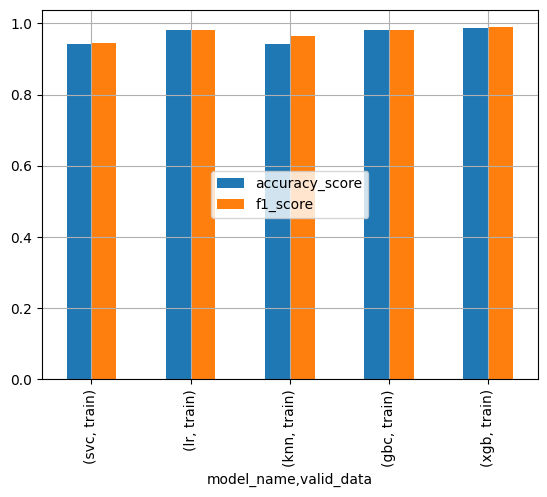

In [53]:
# 모델별 결과 시각화
# pandas의 plot 함수을 사용하여 AI모델 별 accuracy_score, f1_score 수직 그래프 시각화 합니다.
# grid를 추가해 주세요.
# legend를 표시하고, 위치는 center 입니다.
import matplotlib.pyplot as plt
result_comp.plot(kind= 'bar')
plt.legend(loc= 'center'  )
plt.grid()
plt.show()

---------

## 수고하셨습니다.

----------